In [1]:
import os
print(os.getcwd())

/Users/nikhil/Documents/Assignment/StockPredicition/research


In [2]:
os.chdir('../') 

# Confirm change
print("New working directory:", os.getcwd())

New working directory: /Users/nikhil/Documents/Assignment/StockPredicition


In [3]:
import pandas as pd

data = pd.read_csv('data/AAPL_final_dataset.csv')

In [4]:
!pip install lightgbm
!pip install xgboost

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_score',
       'sentiment_label', 'positive_ratio', 'news_count', 'lag_1_close',
       'lag_1_open', 'lag_1_high', 'lag_1_low', 'lag_1_volume', 'lag_1_return',
       'lag_2_return', 'lag_3_return', 'cumulative_return_3', 'SMA_5',
       'SMA_10', 'EMA_10', 'EMA_20', 'MACD', 'RSI', 'bollinger_h',
       'bollinger_l', 'volatility', 'rolling_std_5', 'close_to_open_ratio',
       'high_to_low_ratio', 'volume_change', 'volume_SMA_5', 'lag_2_volume',
       'sentiment_momentum', 'rolling_sentiment_3', 'day_of_week', 'month',
       'quarter', 'is_month_end', 'target'],
      dtype='object')

In [7]:
df = data.dropna().reset_index(drop=True)
df.isna().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
sentiment_score        0
sentiment_label        0
positive_ratio         0
news_count             0
lag_1_close            0
lag_1_open             0
lag_1_high             0
lag_1_low              0
lag_1_volume           0
lag_1_return           0
lag_2_return           0
lag_3_return           0
cumulative_return_3    0
SMA_5                  0
SMA_10                 0
EMA_10                 0
EMA_20                 0
MACD                   0
RSI                    0
bollinger_h            0
bollinger_l            0
volatility             0
rolling_std_5          0
close_to_open_ratio    0
high_to_low_ratio      0
volume_change          0
volume_SMA_5           0
lag_2_volume           0
sentiment_momentum     0
rolling_sentiment_3    0
day_of_week            0
month                  0
quarter                0
is_month_end           0


In [8]:
df.shape

(220, 41)

In [9]:
X = df.drop(columns=["Date", "Open", "High", "Low", "Close", "Volume", "target",'sentiment_label','sentiment_score'])
y = df['target']

In [10]:
df['target'].value_counts()


target
1    126
0     94
Name: count, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # Keep shuffle=False for time-series
)

X_train,X_val,y_train,y_val =train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False  # Keep shuffle=False for time-series
)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, C=1.0),
        "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5, criterion="gini"),
        "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
        "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, boosting_type='gbdt', random_state=42)
    }

    for name, model in models.items():
        print(f"\n Training {name}...")
        model.fit(X_train, y_train)

        # Validation evaluation
        val_preds = model.predict(X_val)
        val_acc = accuracy_score(y_val, val_preds)
        print(f" {name} Validation Accuracy: {val_acc:.4f}")
        print(" Validation Classification Report:")
        print(classification_report(y_val, val_preds))

        # Test evaluation
        test_preds = model.predict(X_test)
        test_acc = accuracy_score(y_test, test_preds)
        print(f" {name} Test Accuracy: {test_acc:.4f}")
        print(" Test Classification Report:")
        print(classification_report(y_test, test_preds))



In [15]:
train_and_evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test)


 Training LogisticRegression...
 LogisticRegression Validation Accuracy: 0.5000
 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.50      1.00      0.67        18

    accuracy                           0.50        36
   macro avg       0.25      0.50      0.33        36
weighted avg       0.25      0.50      0.33        36

 LogisticRegression Test Accuracy: 0.4773
 Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.48      1.00      0.65        21

    accuracy                           0.48        44
   macro avg       0.24      0.50      0.32        44
weighted avg       0.23      0.48      0.31        44


 Training DecisionTreeClassifier...
 DecisionTreeClassifier Validation Accuracy: 0.3889
 Validation Classification Report:
              precision    recall  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [16]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f" Dataset Shapes:")
    print(f"Train: {X_train.shape}, Labels: {y_train.shape}")
    print(f"Validation: {X_val.shape}, Labels: {y_val.shape}")
    print(f"Test: {X_test.shape}, Labels: {y_test.shape}")

    print(f"\n Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Accuracy and Classification Reports
    print(f"\n {name} Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print("📄 Train Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print(f"\n {name} Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print("📄 Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    print(f"\n {name} Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("📄 Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # ROC Curves for Train, Val, and Test
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_val_prob = model.predict_proba(X_val)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]

        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        auc_train = roc_auc_score(y_train, y_train_prob)
        auc_val = roc_auc_score(y_val, y_val_prob)
        auc_test = roc_auc_score(y_test, y_test_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {auc_train:.2f})')
        plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {auc_val:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {auc_test:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{name} ROC Curves')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print(" ROC Curve not available: model does not support probability predictions.")





🔍 Model: LogisticRegression

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LogisticRegression - Fold 1...

 LogisticRegression - Fold 1 Train Accuracy: 0.7742
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.80      0.91      0.85        22

    accuracy                           0.77        31
   macro avg       0.73      0.68      0.69        31
weighted avg       0.76      0.77      0.76        31


 LogisticRegression - Fold 1 Validation Accuracy: 0.6897
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.69      1.00      0.82        20

    accuracy                           0.69        29
   macro avg       0.34      0.50      0.41        29
weighted avg       0.48     

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

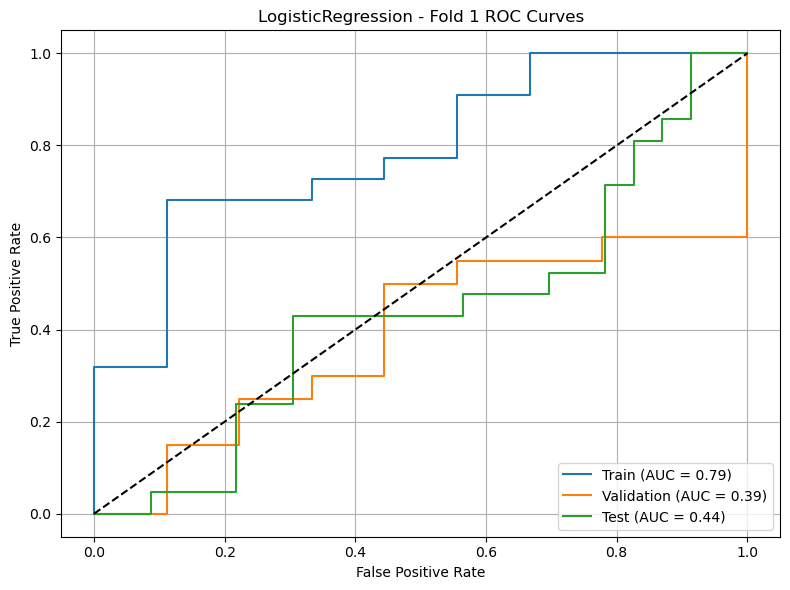


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LogisticRegression - Fold 2...

 LogisticRegression - Fold 2 Train Accuracy: 0.7333
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.73      0.98      0.84        42

    accuracy                           0.73        60
   macro avg       0.74      0.57      0.55        60
weighted avg       0.74      0.73      0.67        60


 LogisticRegression - Fold 2 Validation Accuracy: 0.4483
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.48      0.87      0.62        15

    accuracy                           0.45        29
   macro avg       0.24      0.43      0.31        29
weighted avg       0.25      0.45      0.32        29


 L

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


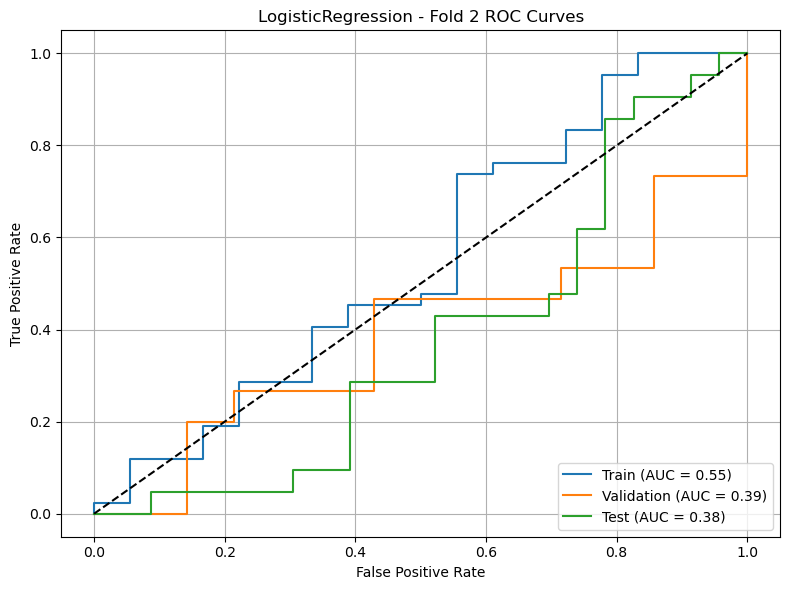


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LogisticRegression - Fold 3...

 LogisticRegression - Fold 3 Train Accuracy: 0.6404
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        32
           1       0.65      0.96      0.77        57

    accuracy                           0.64        89
   macro avg       0.57      0.51      0.44        89
weighted avg       0.59      0.64      0.54        89


 LogisticRegression - Fold 3 Validation Accuracy: 0.5172
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.52      1.00      0.68        15

    accuracy                           0.52        29
   macro avg       0.26      0.50      0.34        29
weighted avg       0.27      0.52      0.35        29


 L

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


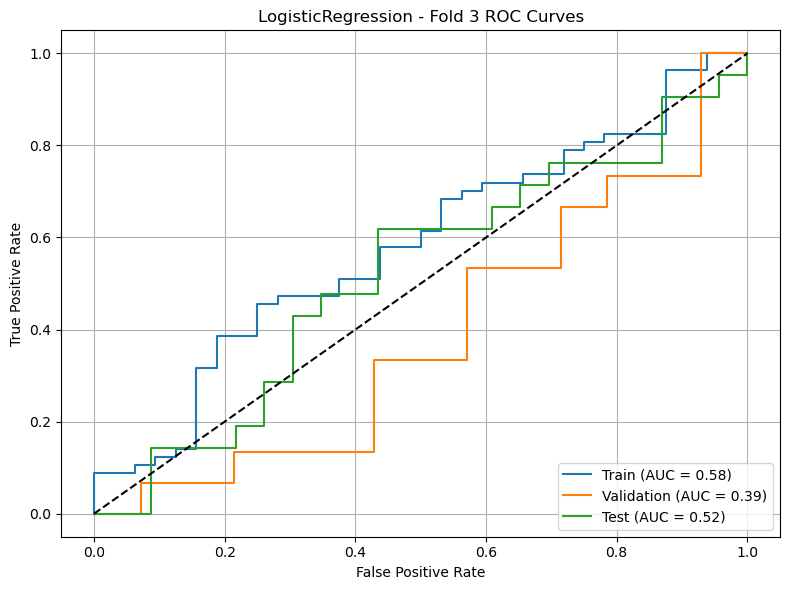


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LogisticRegression - Fold 4...

 LogisticRegression - Fold 4 Train Accuracy: 0.6271
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.15      0.24        46
           1       0.63      0.93      0.75        72

    accuracy                           0.63       118
   macro avg       0.61      0.54      0.50       118
weighted avg       0.61      0.63      0.55       118


 LogisticRegression - Fold 4 Validation Accuracy: 0.4828
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.22      0.21         9
           1       0.63      0.60      0.62        20

    accuracy                           0.48        29
   macro avg       0.42      0.41      0.41        29
weighted avg       0.50      0.48      0.49        29




/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


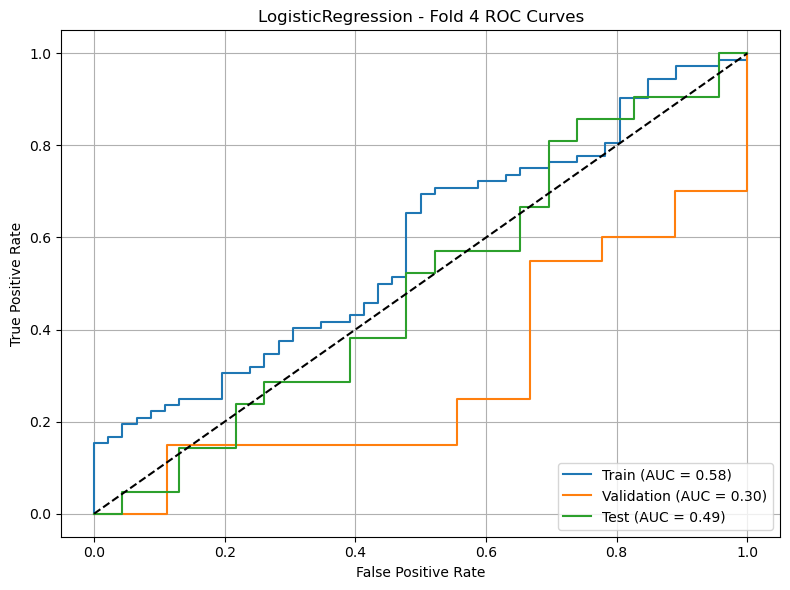


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LogisticRegression - Fold 5...

 LogisticRegression - Fold 5 Train Accuracy: 0.6259
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.63      1.00      0.77        92

    accuracy                           0.63       147
   macro avg       0.31      0.50      0.38       147
weighted avg       0.39      0.63      0.48       147


 LogisticRegression - Fold 5 Validation Accuracy: 0.4483
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.45      1.00      0.62        13

    accuracy                           0.45        29
   macro avg       0.22      0.50      0.31        29
weighted avg       0.20      0.45      0.28        29




/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

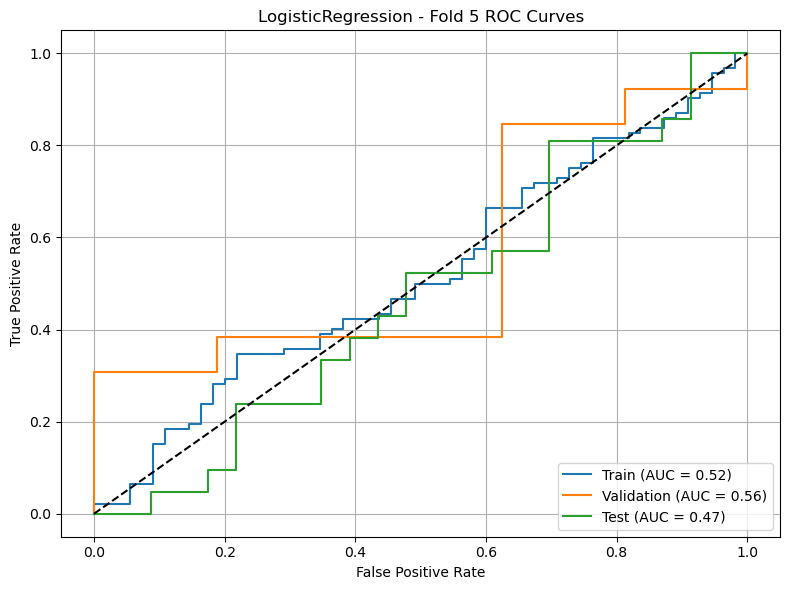



🔍 Model: DecisionTreeClassifier

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training DecisionTreeClassifier - Fold 1...

 DecisionTreeClassifier - Fold 1 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


 DecisionTreeClassifier - Fold 1 Validation Accuracy: 0.6552
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.73      0.80      0.76        20

    accuracy                           0.66        29
   macro avg       0.58      0.57      0.57        29
weighted avg

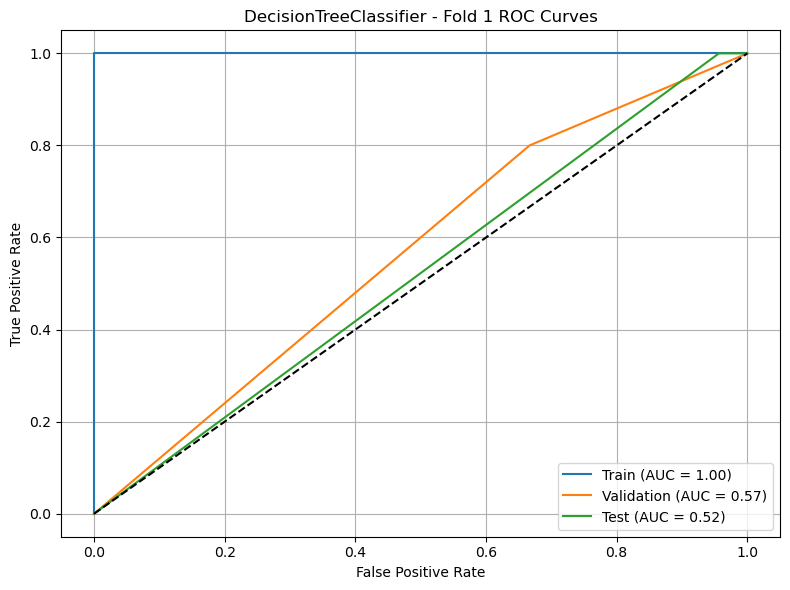


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training DecisionTreeClassifier - Fold 2...

 DecisionTreeClassifier - Fold 2 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 DecisionTreeClassifier - Fold 2 Validation Accuracy: 0.3448
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.07      0.10        14
           1       0.41      0.60      0.49        15

    accuracy                           0.34        29
   macro avg       0.28      0.34      0.29        29
weighted avg       0.28      0.34      0.30   

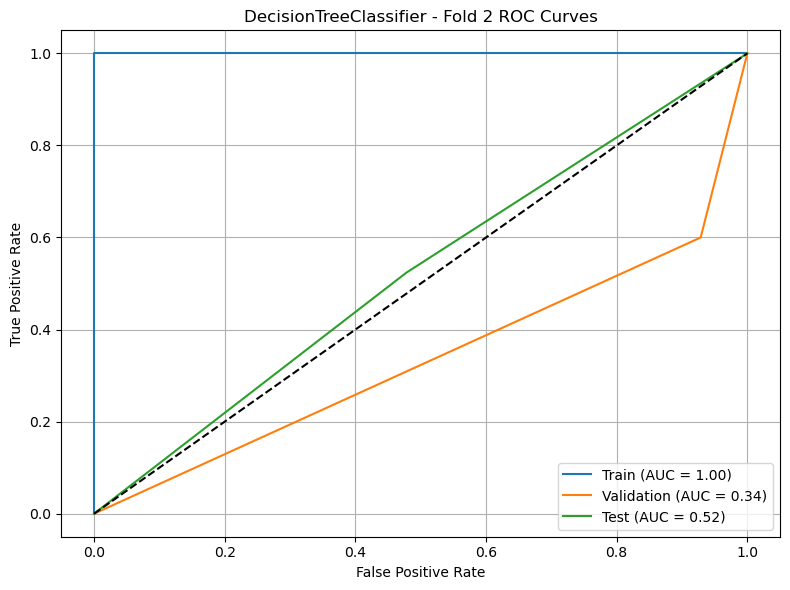


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training DecisionTreeClassifier - Fold 3...

 DecisionTreeClassifier - Fold 3 Train Accuracy: 0.9438
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.92      1.00      0.96        57

    accuracy                           0.94        89
   macro avg       0.96      0.92      0.94        89
weighted avg       0.95      0.94      0.94        89


 DecisionTreeClassifier - Fold 3 Validation Accuracy: 0.4483
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.86      0.60        14
           1       0.33      0.07      0.11        15

    accuracy                           0.45        29
   macro avg       0.40      0.46      0.36        29
weighted avg       0.40      0.45      0.35   

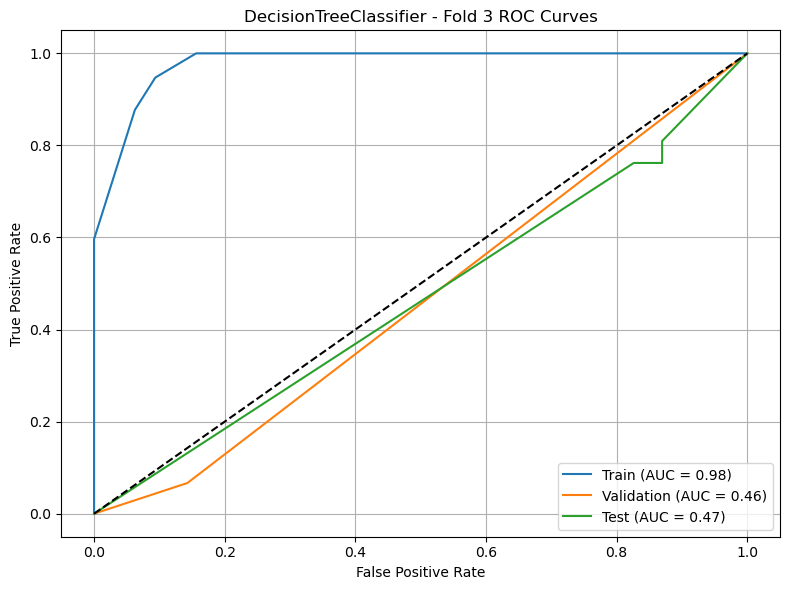


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training DecisionTreeClassifier - Fold 4...

 DecisionTreeClassifier - Fold 4 Train Accuracy: 0.8559
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78        46
           1       0.82      0.97      0.89        72

    accuracy                           0.86       118
   macro avg       0.88      0.82      0.84       118
weighted avg       0.87      0.86      0.85       118


 DecisionTreeClassifier - Fold 4 Validation Accuracy: 0.6552
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.69      0.90      0.78        20

    accuracy                           0.66        29
   macro avg       0.51      0.51      0.47        29
weighted avg       0.58      0.66      0.59 

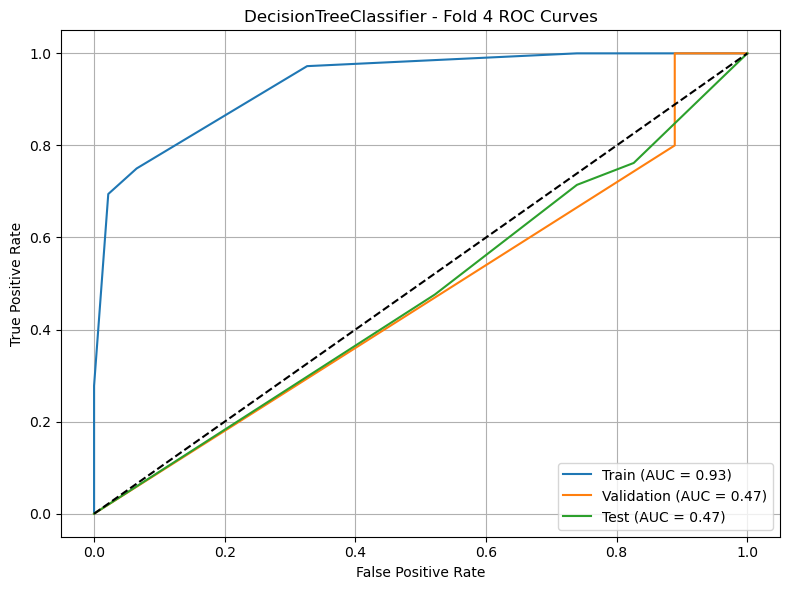


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training DecisionTreeClassifier - Fold 5...

 DecisionTreeClassifier - Fold 5 Train Accuracy: 0.8639
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        55
           1       0.88      0.90      0.89        92

    accuracy                           0.86       147
   macro avg       0.86      0.85      0.85       147
weighted avg       0.86      0.86      0.86       147


 DecisionTreeClassifier - Fold 5 Validation Accuracy: 0.4483
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.44      0.92      0.60        13

    accuracy                           0.45        29
   macro avg       0.47      0.49      0.36        29
weighted avg       0.48      0.45      0.33 

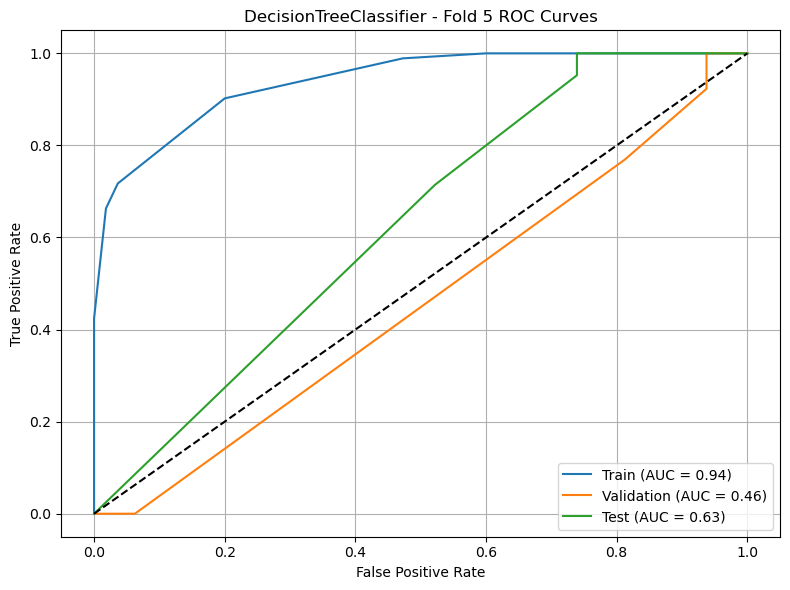



🔍 Model: RandomForestClassifier

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training RandomForestClassifier - Fold 1...

 RandomForestClassifier - Fold 1 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


 RandomForestClassifier - Fold 1 Validation Accuracy: 0.6897
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.69      1.00      0.82        20

    accuracy                           0.69        29
   macro avg       0.34      0.50      0.41        29
weighted avg

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

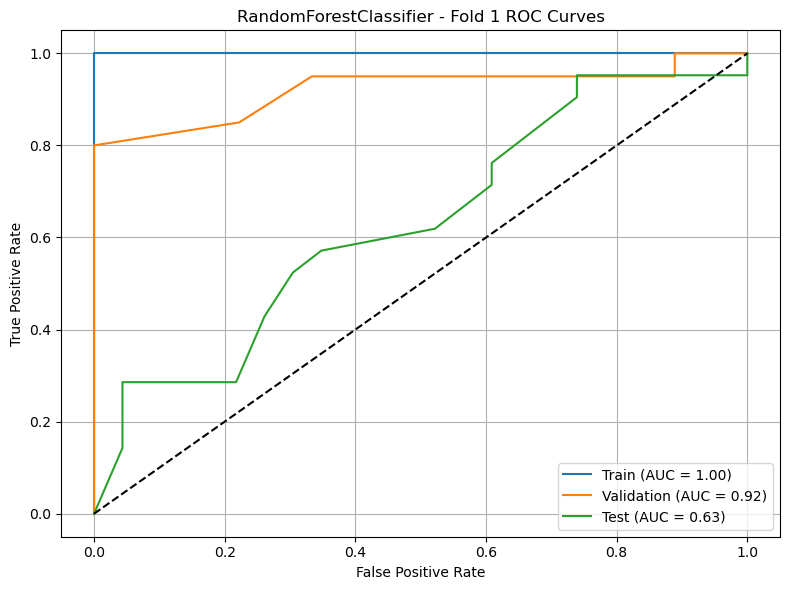


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training RandomForestClassifier - Fold 2...

 RandomForestClassifier - Fold 2 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 RandomForestClassifier - Fold 2 Validation Accuracy: 0.5517
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.54      0.93      0.68        15

    accuracy                           0.55        29
   macro avg       0.60      0.54      0.46        29
weighted avg       0.60      0.55      0.47   

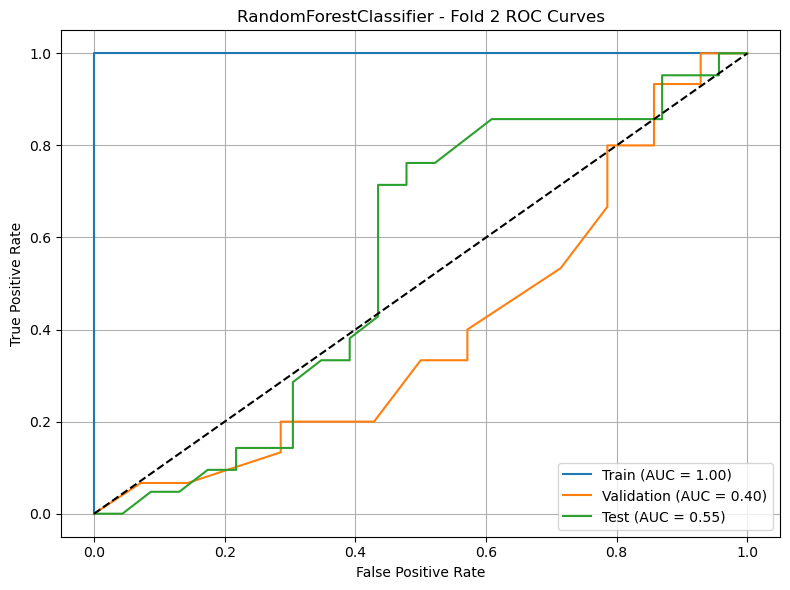


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training RandomForestClassifier - Fold 3...

 RandomForestClassifier - Fold 3 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


 RandomForestClassifier - Fold 3 Validation Accuracy: 0.5172
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63        14
           1       0.60      0.20      0.30        15

    accuracy                           0.52        29
   macro avg       0.55      0.53      0.47        29
weighted avg       0.55      0.52      0.46   

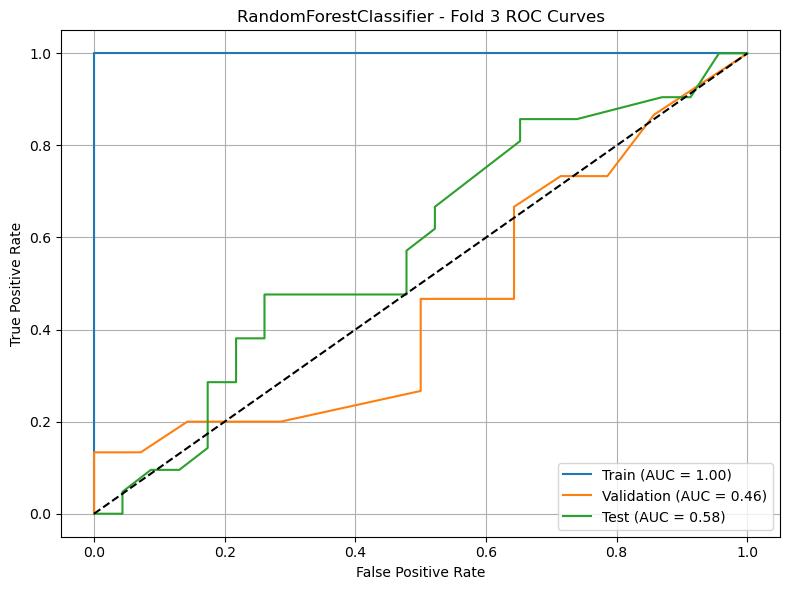


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training RandomForestClassifier - Fold 4...

 RandomForestClassifier - Fold 4 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        72

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 RandomForestClassifier - Fold 4 Validation Accuracy: 0.4138
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.89      0.48         9
           1       0.80      0.20      0.32        20

    accuracy                           0.41        29
   macro avg       0.57      0.54      0.40        29
weighted avg       0.66      0.41      0.37 

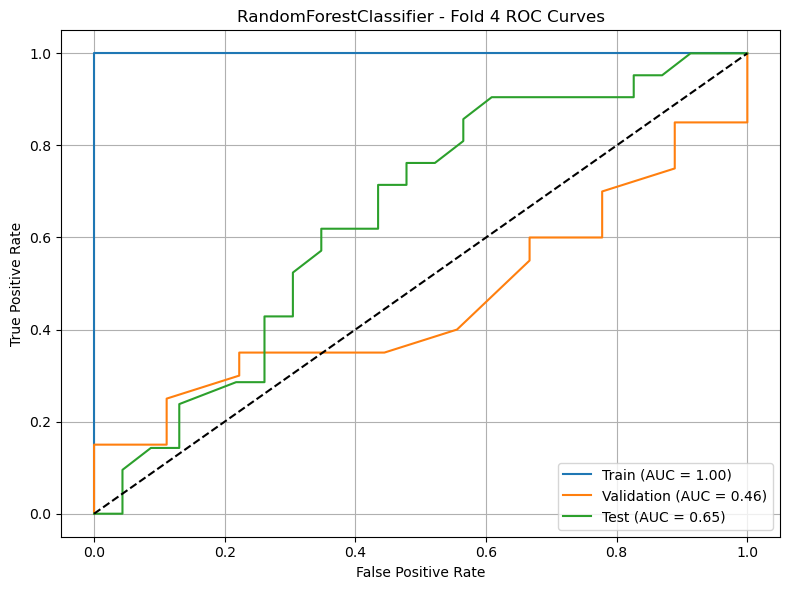


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training RandomForestClassifier - Fold 5...

 RandomForestClassifier - Fold 5 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        92

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


 RandomForestClassifier - Fold 5 Validation Accuracy: 0.3793
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31        16
           1       0.37      0.54      0.44        13

    accuracy                           0.38        29
   macro avg       0.38      0.39      0.37        29
weighted avg       0.39      0.38      0.37 

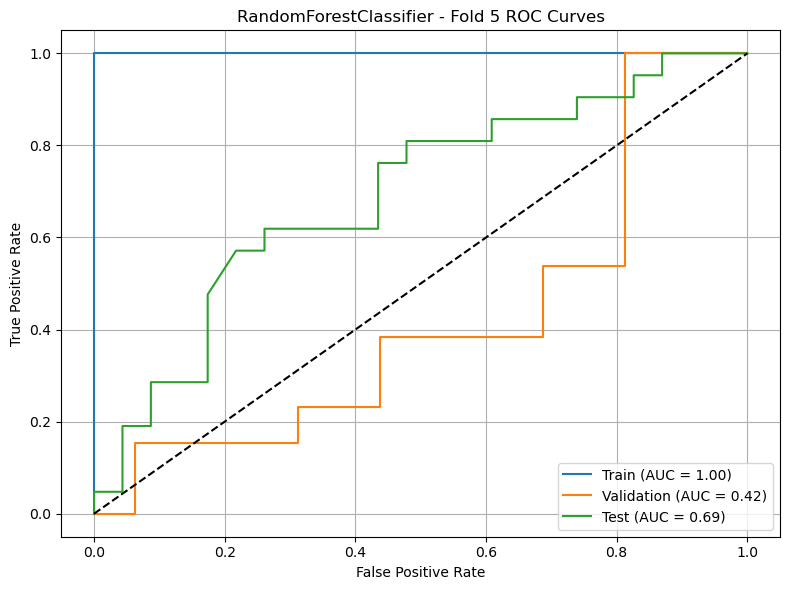



🔍 Model: GradientBoosting

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training GradientBoosting - Fold 1...

 GradientBoosting - Fold 1 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


 GradientBoosting - Fold 1 Validation Accuracy: 0.7586
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.74      1.00      0.85        20

    accuracy                           0.76        29
   macro avg       0.87      0.61      0.61        29
weighted avg       0.82      0.76   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


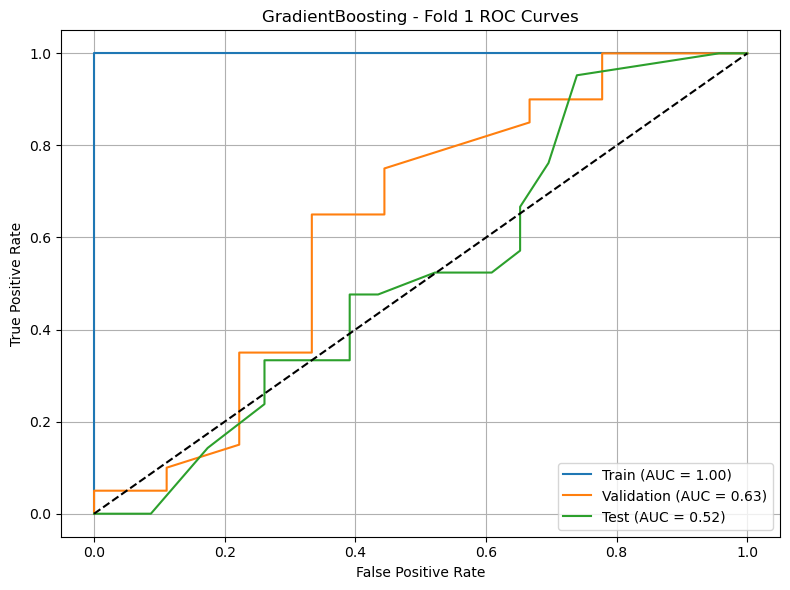


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training GradientBoosting - Fold 2...

 GradientBoosting - Fold 2 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 GradientBoosting - Fold 2 Validation Accuracy: 0.3793
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.29      0.31        14
           1       0.41      0.47      0.44        15

    accuracy                           0.38        29
   macro avg       0.37      0.38      0.37        29
weighted avg       0.37      0.38      0.37        29


 Gradien

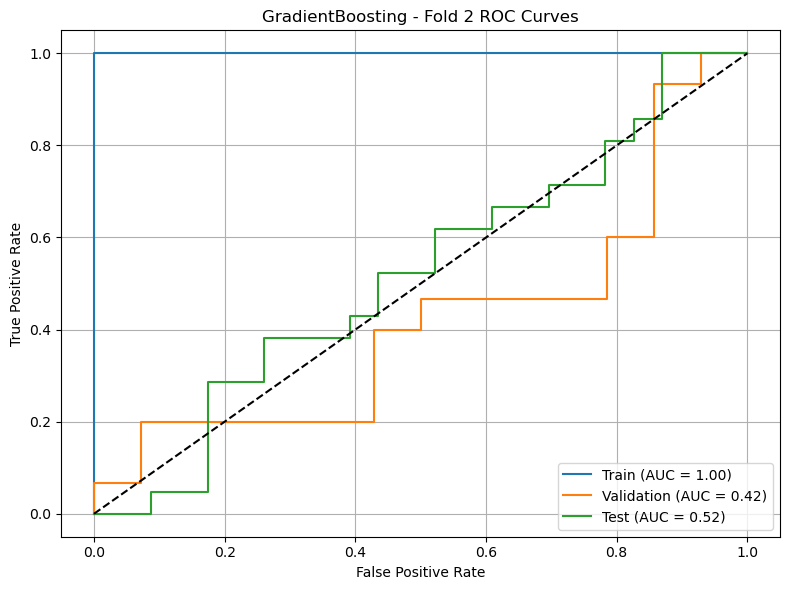


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training GradientBoosting - Fold 3...

 GradientBoosting - Fold 3 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


 GradientBoosting - Fold 3 Validation Accuracy: 0.5172
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63        14
           1       0.60      0.20      0.30        15

    accuracy                           0.52        29
   macro avg       0.55      0.53      0.47        29
weighted avg       0.55      0.52      0.46        29


 Gradien

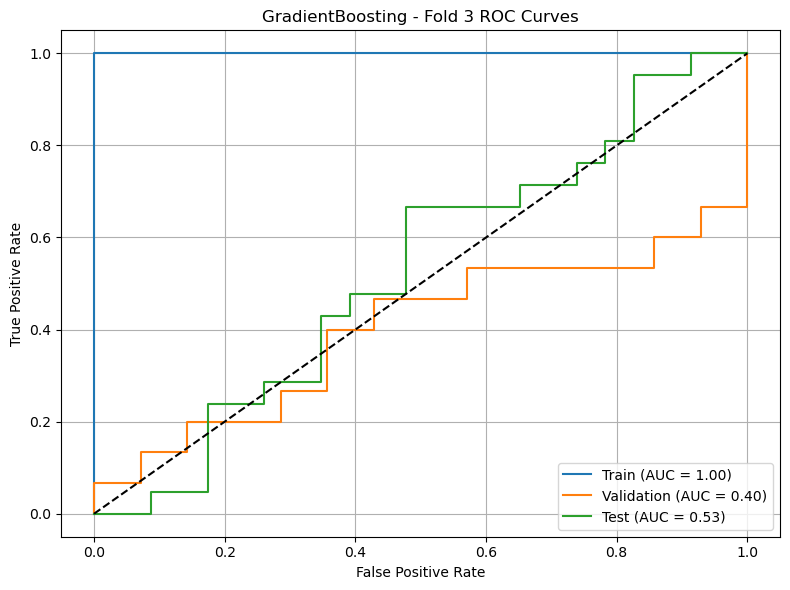


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training GradientBoosting - Fold 4...

 GradientBoosting - Fold 4 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        72

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 GradientBoosting - Fold 4 Validation Accuracy: 0.5862
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.44      0.40         9
           1       0.72      0.65      0.68        20

    accuracy                           0.59        29
   macro avg       0.54      0.55      0.54        29
weighted avg       0.61      0.59      0.60        29


 Gradi

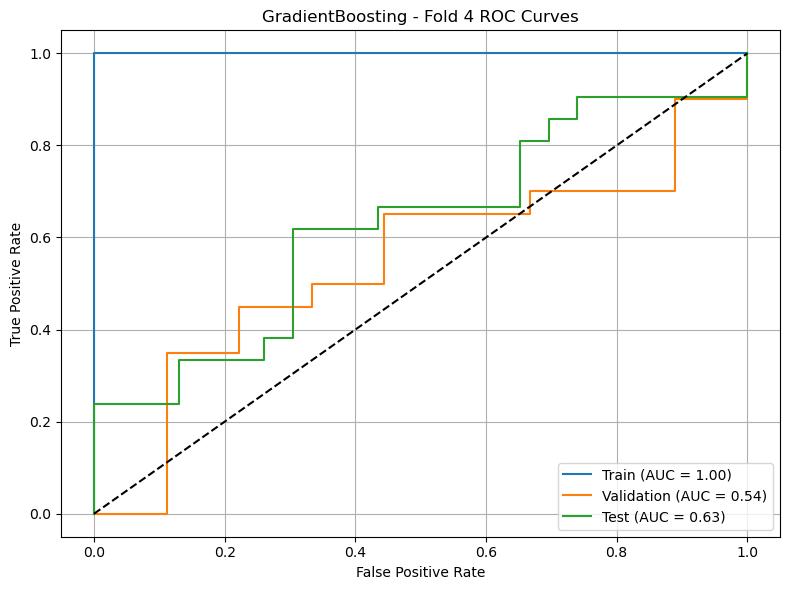


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training GradientBoosting - Fold 5...

 GradientBoosting - Fold 5 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        92

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


 GradientBoosting - Fold 5 Validation Accuracy: 0.5172
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.47      0.54      0.50        13

    accuracy                           0.52        29
   macro avg       0.52      0.52      0.52        29
weighted avg       0.52      0.52      0.52        29


 Gradi

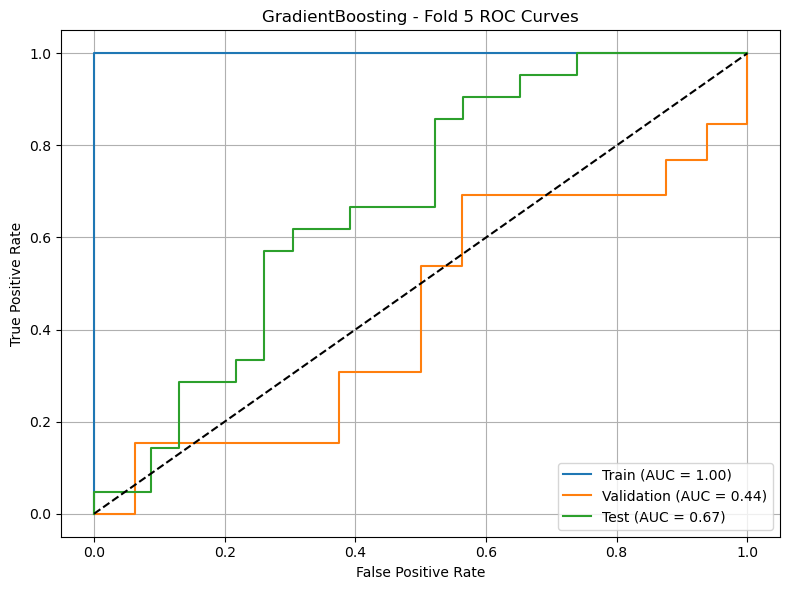



🔍 Model: AdaBoost

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training AdaBoost - Fold 1...

 AdaBoost - Fold 1 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


 AdaBoost - Fold 1 Validation Accuracy: 0.7241
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.71      1.00      0.83        20

    accuracy                           0.72        29
   macro avg       0.86      0.56      0.52        29
weighted avg       0.80      0.72      0.64        29


 AdaBoost - 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: P

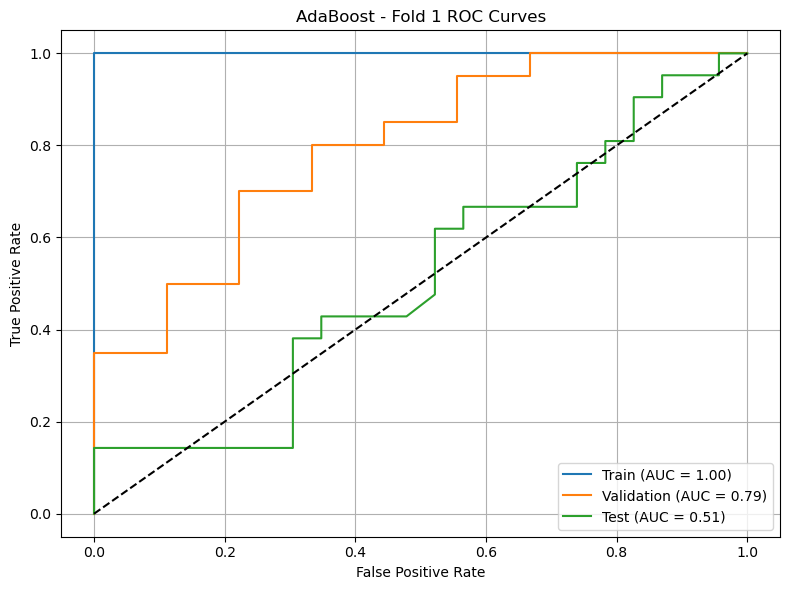


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training AdaBoost - Fold 2...

 AdaBoost - Fold 2 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 AdaBoost - Fold 2 Validation Accuracy: 0.4138
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        14
           1       0.45      0.60      0.51        15

    accuracy                           0.41        29
   macro avg       0.39      0.41      0.39        29
weighted avg       0.39      0.41      0.39        29


 AdaBoost - Fold 2 Test Accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


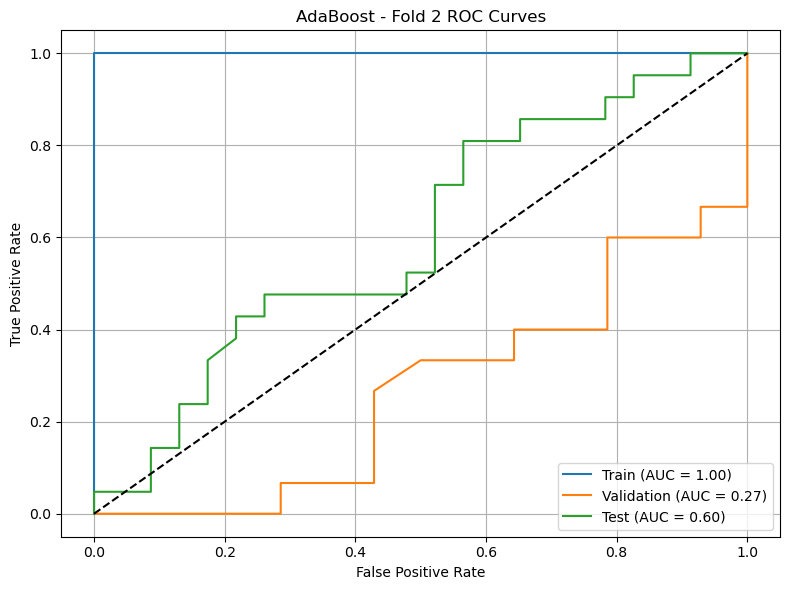


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training AdaBoost - Fold 3...

 AdaBoost - Fold 3 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


 AdaBoost - Fold 3 Validation Accuracy: 0.5172
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.53      0.53      0.53        15

    accuracy                           0.52        29
   macro avg       0.52      0.52      0.52        29
weighted avg       0.52      0.52      0.52        29


 AdaBoost - Fold 3 Test Accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


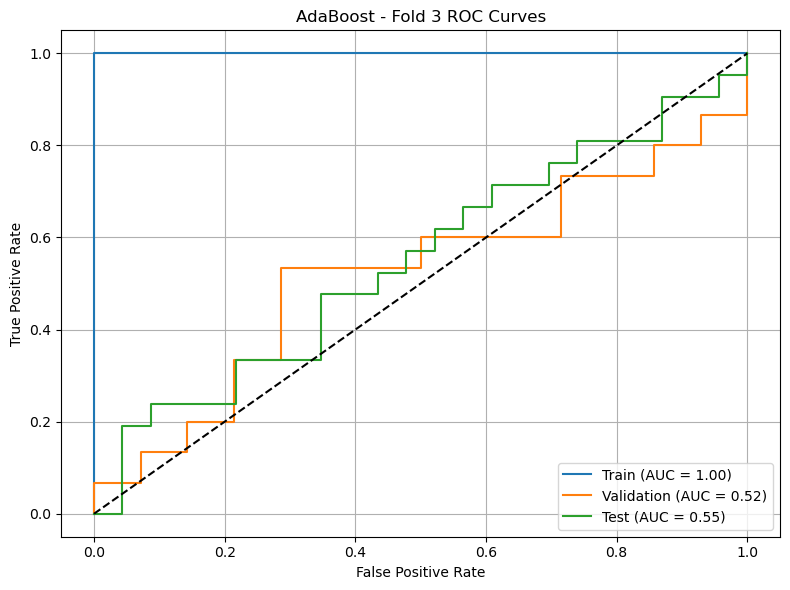


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training AdaBoost - Fold 4...

 AdaBoost - Fold 4 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        72

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 AdaBoost - Fold 4 Validation Accuracy: 0.3793
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.44      0.31         9
           1       0.58      0.35      0.44        20

    accuracy                           0.38        29
   macro avg       0.41      0.40      0.37        29
weighted avg       0.48      0.38      0.40        29


 AdaBoost - Fold 4 Test Accura

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


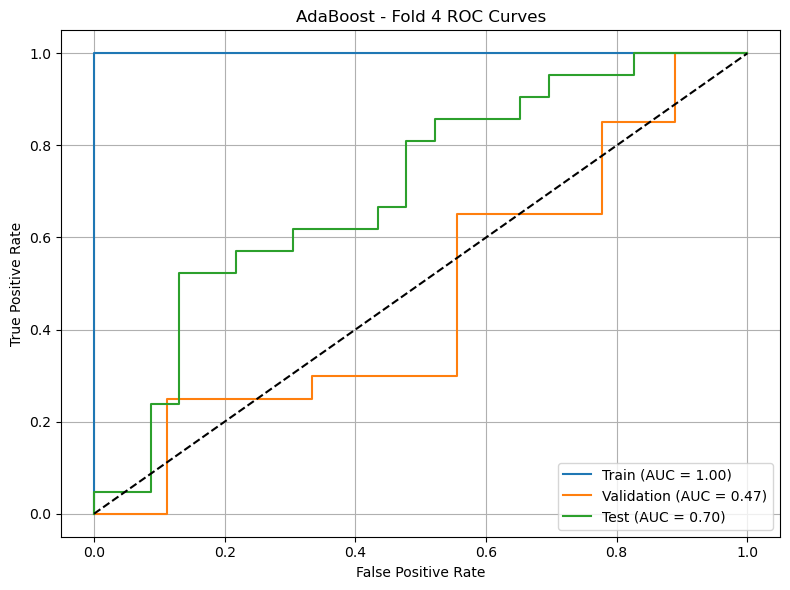


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training AdaBoost - Fold 5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 AdaBoost - Fold 5 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        92

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


 AdaBoost - Fold 5 Validation Accuracy: 0.4138
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.30      0.23      0.26        13

    accuracy                           0.41        29
   macro avg       0.39      0.40      0.39        29
weighted avg       0.40      0.41      0.40        29


 AdaBoost - Fold 5 Test Accuracy: 0.6364
📄 Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
       

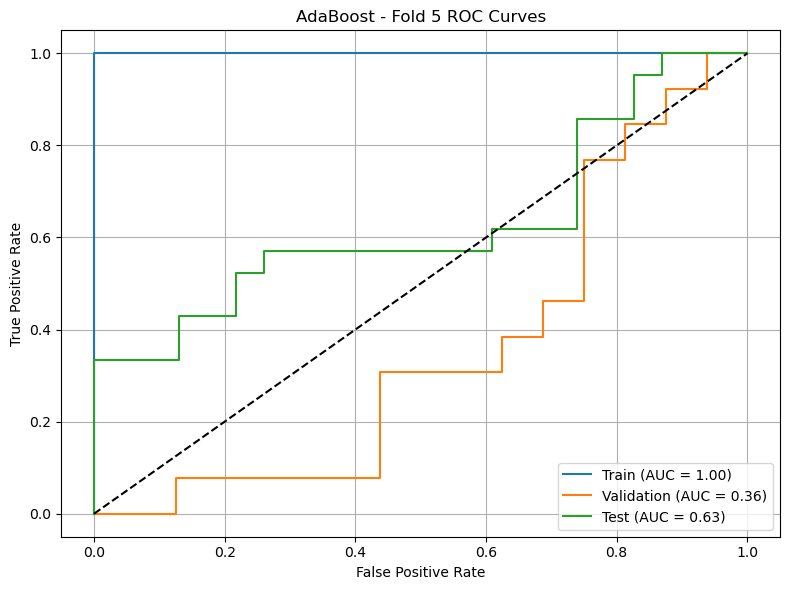



🔍 Model: XGBoost

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training XGBoost - Fold 1...

 XGBoost - Fold 1 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


 XGBoost - Fold 1 Validation Accuracy: 0.6897
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.69      1.00      0.82        20

    accuracy                           0.69        29
   macro avg       0.34      0.50      0.41        29
weighted avg       0.48      0.69      0.56        29


 XGBoost - Fold 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

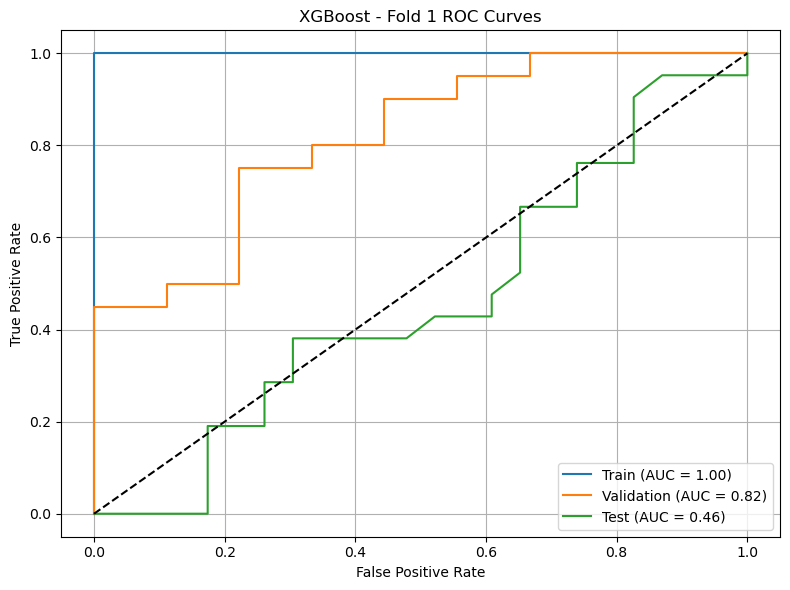


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training XGBoost - Fold 2...

 XGBoost - Fold 2 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        42

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 XGBoost - Fold 2 Validation Accuracy: 0.4828
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.50      0.67      0.57        15

    accuracy                           0.48        29
   macro avg       0.47      0.48      0.46        29
weighted avg       0.47      0.48      0.46        29


 XGBoost - Fold 2 Test Accuracy: 0.

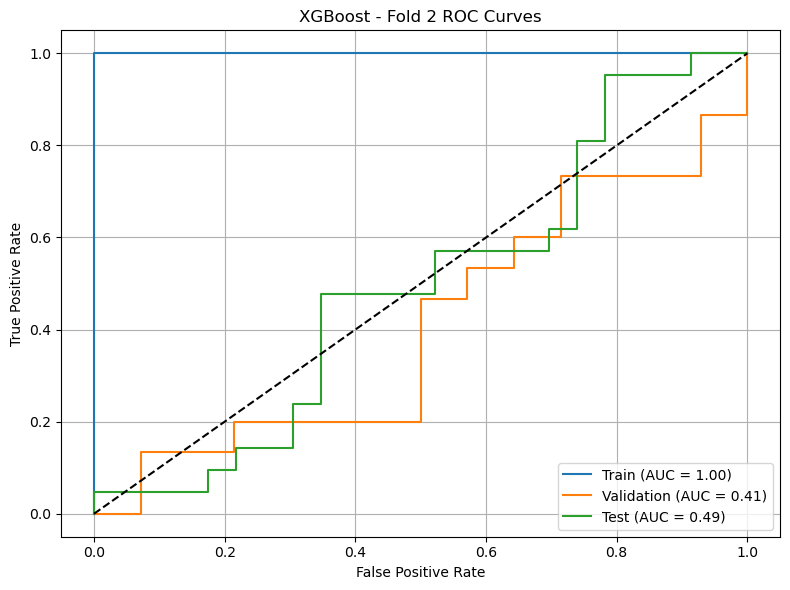


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training XGBoost - Fold 3...

 XGBoost - Fold 3 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


 XGBoost - Fold 3 Validation Accuracy: 0.4483
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        14
           1       0.44      0.27      0.33        15

    accuracy                           0.45        29
   macro avg       0.45      0.45      0.43        29
weighted avg       0.45      0.45      0.43        29


 XGBoost - Fold 3 Test Accuracy: 0.

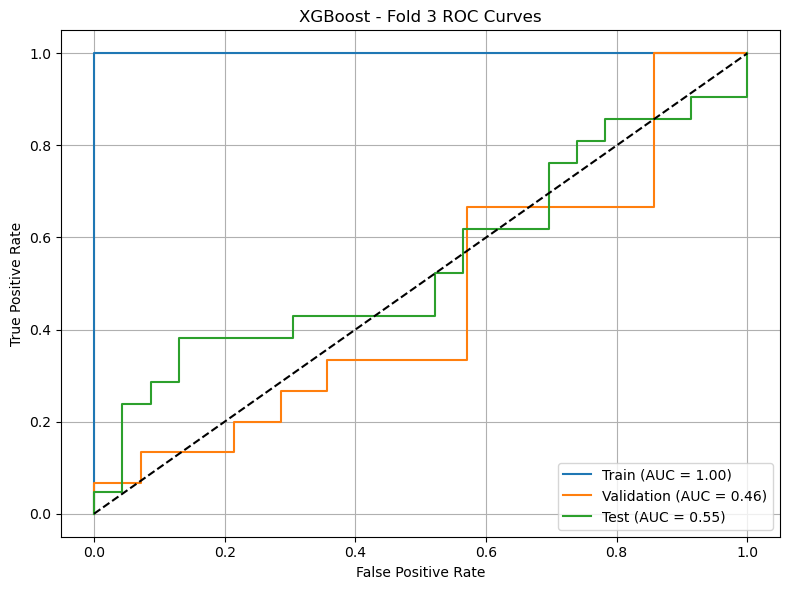


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training XGBoost - Fold 4...

 XGBoost - Fold 4 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        72

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 XGBoost - Fold 4 Validation Accuracy: 0.5517
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.56      0.43         9
           1       0.73      0.55      0.63        20

    accuracy                           0.55        29
   macro avg       0.55      0.55      0.53        29
weighted avg       0.62      0.55      0.57        29


 XGBoost - Fold 4 Test Accuracy: 

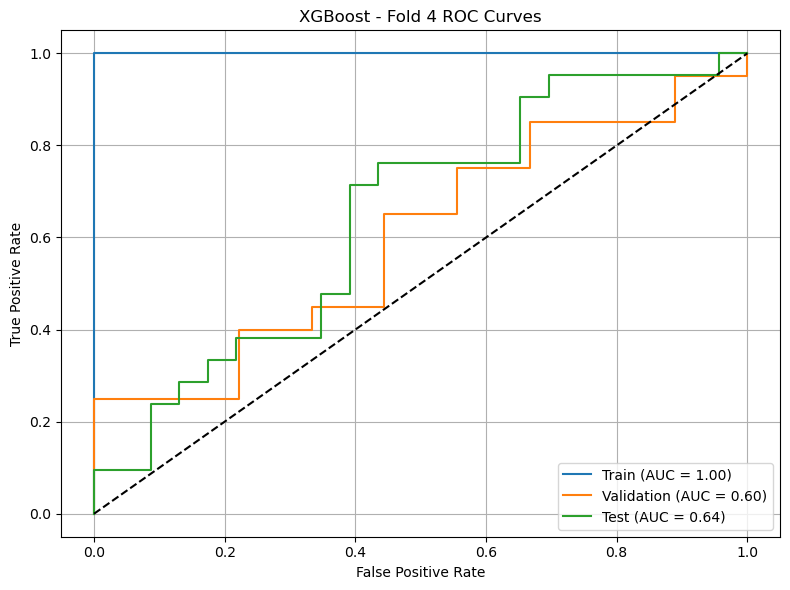


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training XGBoost - Fold 5...

 XGBoost - Fold 5 Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        92

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


 XGBoost - Fold 5 Validation Accuracy: 0.4828
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.46      0.85      0.59        13

    accuracy                           0.48        29
   macro avg       0.53      0.52      0.44        29
weighted avg       0.54      0.48      0.42        29


 XGBoost - Fold 5 Test Accuracy: 

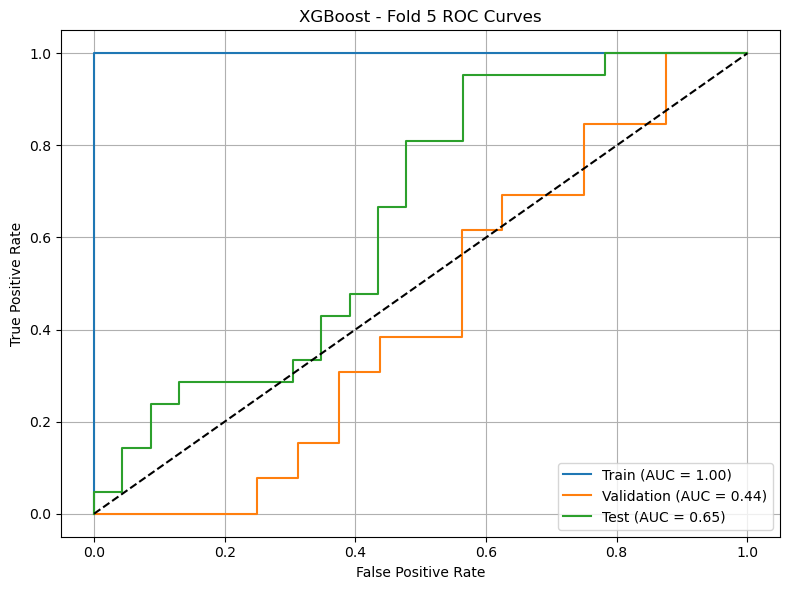



🔍 Model: LightGBM

 Fold 1
 Dataset Shapes:
Train: (31, 32), Labels: (31,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LightGBM - Fold 1...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 22, number of negative: 9
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.709677 -> initscore=0.893818
[LightGBM] [Info] Start training from score 0.893818
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

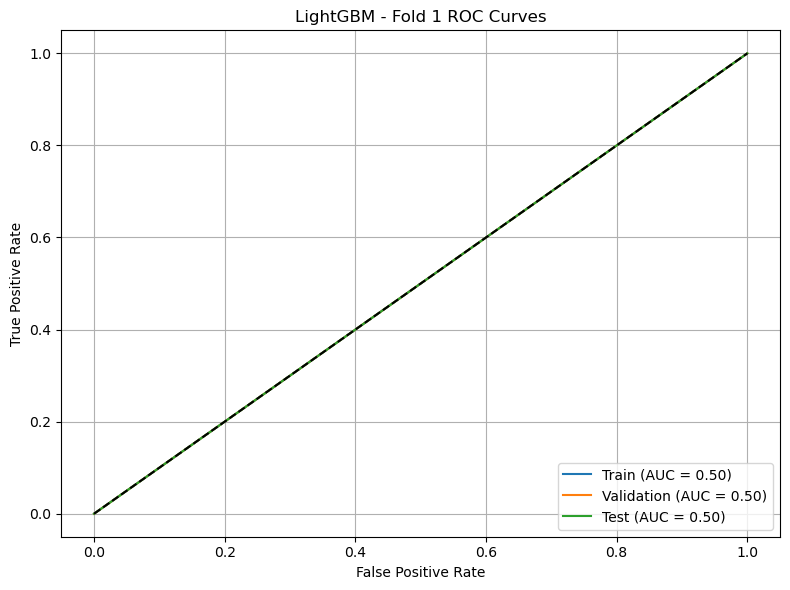


 Fold 2
 Dataset Shapes:
Train: (60, 32), Labels: (60,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LightGBM - Fold 2...
[LightGBM] [Info] Number of positive: 42, number of negative: 18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

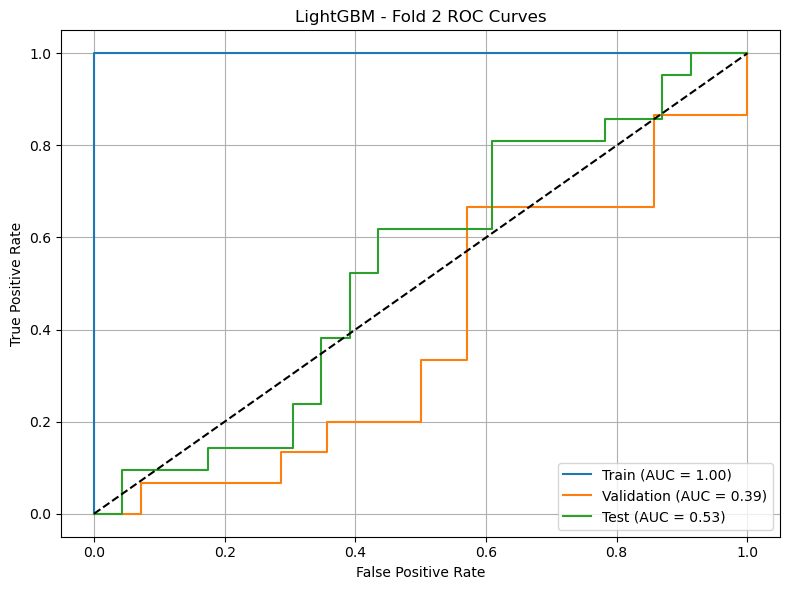


 Fold 3
 Dataset Shapes:
Train: (89, 32), Labels: (89,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LightGBM - Fold 3...
[LightGBM] [Info] Number of positive: 57, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640449 -> initscore=0.577315
[LightGBM] [Info] Start training from score 0.577315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

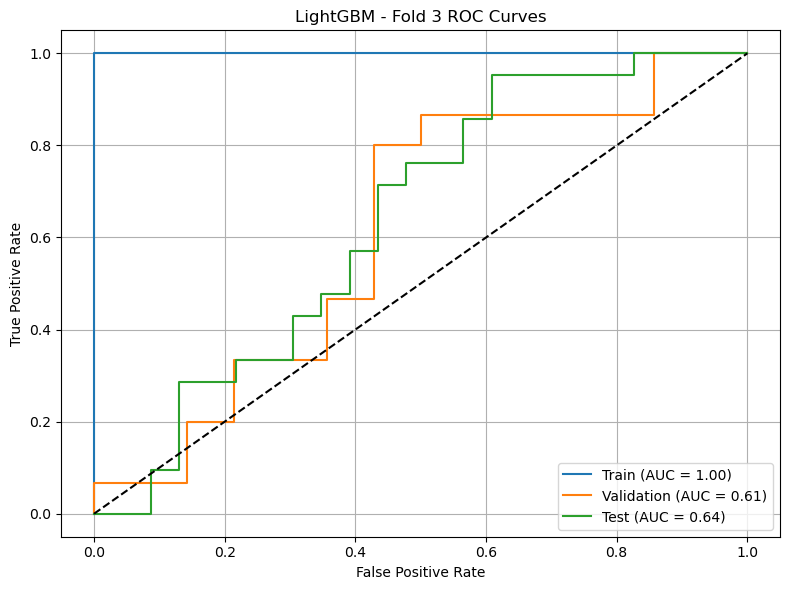


 Fold 4
 Dataset Shapes:
Train: (118, 32), Labels: (118,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LightGBM - Fold 4...
[LightGBM] [Info] Number of positive: 72, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.610169 -> initscore=0.448025
[LightGBM] [Info] Start training from score 0.448025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

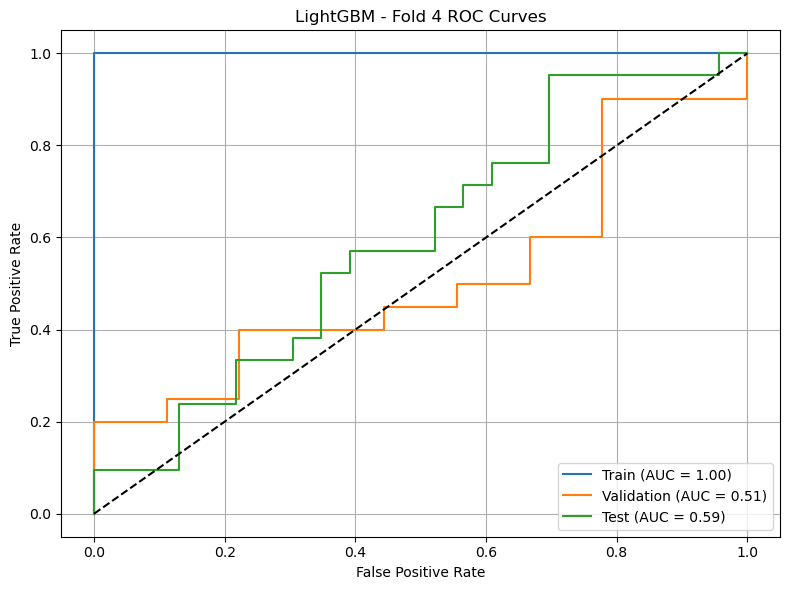


 Fold 5
 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training LightGBM - Fold 5...
[LightGBM] [Info] Number of positive: 92, number of negative: 55
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404
[LightGBM] [Info] Number of data points in the train set: 147, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625850 -> initscore=0.514455
[LightGBM] [Info] Start training from score 0.514455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

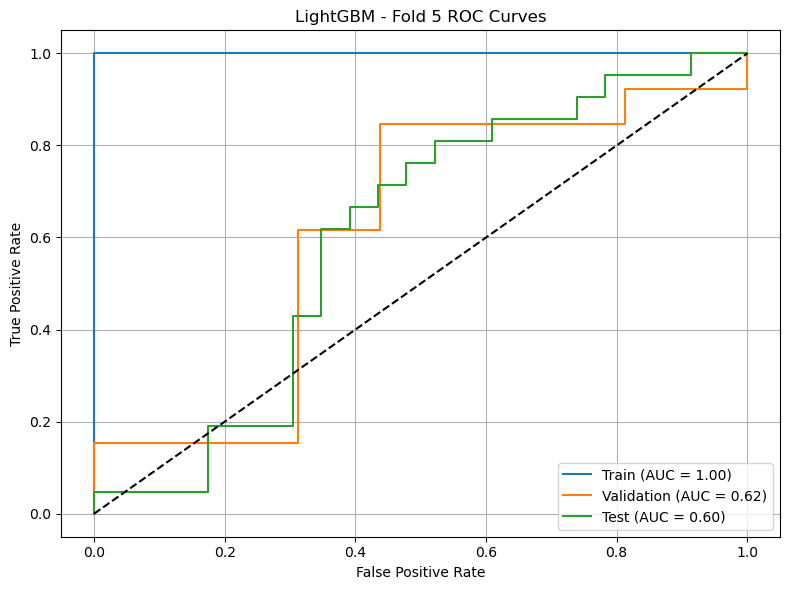

In [17]:
tscv = TimeSeriesSplit(n_splits=5)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

#  Models to Try
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, C=1.0),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5, criterion="gini"),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, boosting_type='gbdt', random_state=42)
}

#  Loop Through Models and Folds
for model_name, model in models.items():
    print(f"\n\n==============================")
    print(f"🔍 Model: {model_name}")
    
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_val)):
        print(f"\n Fold {fold + 1}")
        X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]


        evaluate_model(f"{model_name} - Fold {fold + 1}", model,
                       X_train, y_train, X_val, y_val, X_test, y_test)

In [18]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)


In [19]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 7, 128),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'random_state': 42
    }

    model = LGBMClassifier(**params, verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)
best_params = study.best_params
print("Best Params:", study.best_params)
print("Best Validation Accuracy:", study.best_value)


Best Params: {'n_estimators': 791, 'max_depth': 8, 'num_leaves': 86, 'learning_rate': 0.11891518296588871, 'subsample': 0.6943787289860529, 'colsample_bytree': 0.6251783878915637, 'reg_alpha': 0.2356352622169011, 'reg_lambda': 0.519064587418869, 'min_child_samples': 29}
Best Validation Accuracy: 0.6896551724137931


 Dataset Shapes:
Train: (147, 32), Labels: (147,)
Validation: (29, 32), Labels: (29,)
Test: (44, 32), Labels: (44,)

 Training Tuned LightGBM...

 Tuned LightGBM Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        92

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


 Tuned LightGBM Validation Accuracy: 0.6897
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.60      0.92      0.73        13

    accuracy                           0.69        29
   macro avg       0.74      0.71      0.68        29
weighted avg       0.76      0.69      0.68        29


 Tuned LightGBM Test Accuracy: 0.5227
📄 Test Cla

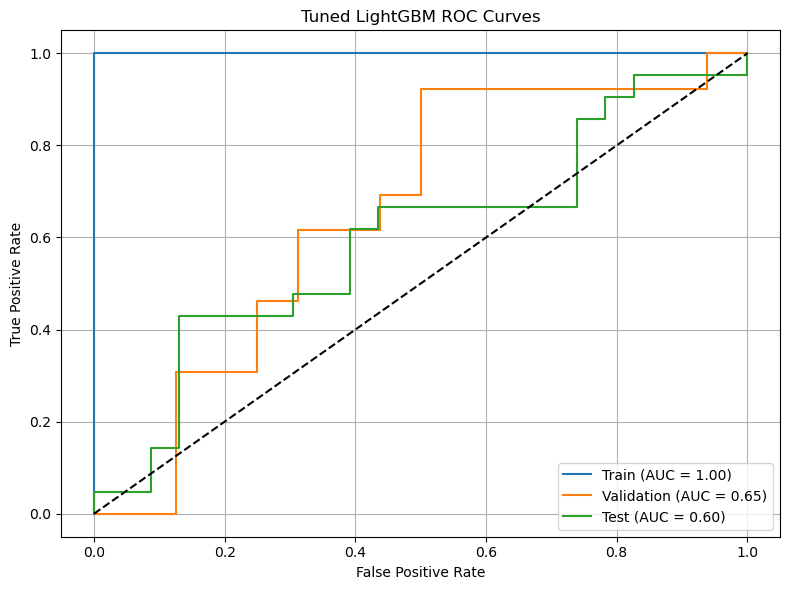

In [20]:
from lightgbm import LGBMClassifier




best_lgbm = LGBMClassifier(**best_params, random_state=42, verbose=-1)
best_lgbm.fit(X_train, y_train)

# Optionally evaluate
evaluate_model("Tuned LightGBM", best_lgbm, X_train, y_train, X_val, y_val, X_test, y_test)


In [21]:
import os
import joblib
os.makedirs('models', exist_ok=True)
#Save model
joblib.dump(best_lgbm, 'models/AAPL_lightgbm_6.pkl')

['models/AAPL_lightgbm_6.pkl']

# Load model
loaded_model = joblib.load('models/AAPL_lightgbm.pkl')
loaded_model

                Feature  Importance
0            news_count         174
4                   RSI         172
6          lag_3_return         165
1            lag_1_high         153
12         lag_1_volume         151
3   cumulative_return_3         144
5   rolling_sentiment_3         119
7          lag_2_volume         108
2    sentiment_momentum         100
9            volatility          99
10        volume_change          97
16         lag_1_return          94
11          lag_1_close          91
13                 MACD          81
17          bollinger_l          77
15       positive_ratio          73
8           bollinger_h          70
14         lag_2_return          61
19                SMA_5          60
18               EMA_10          36


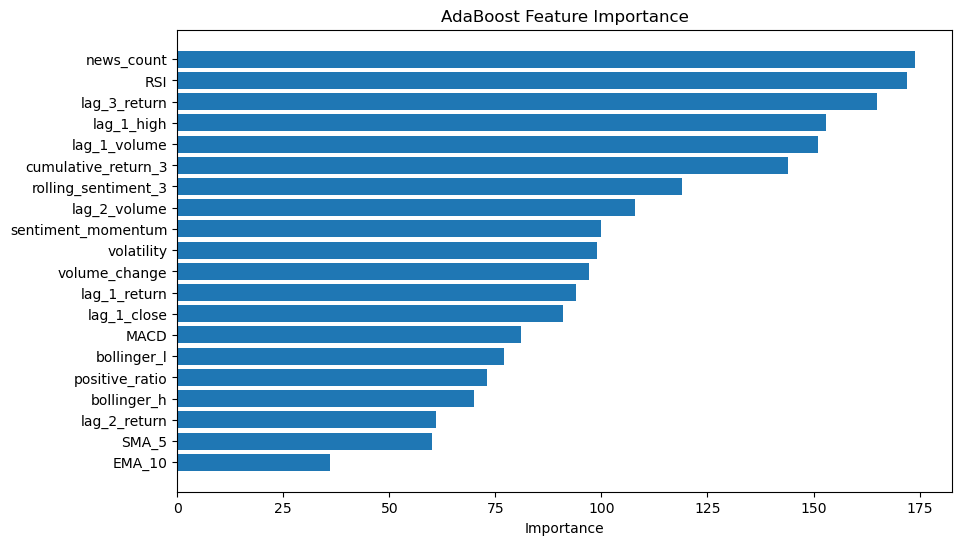

In [57]:
importances = best_lgbm.feature_importances_
feature_names = X_train.columns  # Or list of feature names if not a DataFrame

# Create a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print
print(feat_imp_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.xlabel("Importance")
plt.title("AdaBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [59]:
# Sort by importance descending and take top 10
top_10_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()


In [61]:
X_filtered = X[top_10_features]


In [63]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_filtered, y, test_size=0.2,  shuffle=False  # Keep shuffle=False for time-series
)

X_train,X_val,y_train,y_val =train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False  # Keep shuffle=False for time-series
)

 Dataset Shapes:
Train: (140, 10), Labels: (140,)
Validation: (36, 10), Labels: (36,)
Test: (44, 10), Labels: (44,)

 Training Tuned_LGBM...

 Tuned_LGBM Train Accuracy: 1.0000
📄 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        87

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


 Tuned_LGBM Validation Accuracy: 0.5000
📄 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        18
           1       0.50      0.83      0.62        18

    accuracy                           0.50        36
   macro avg       0.50      0.50      0.44        36
weighted avg       0.50      0.50      0.44        36


 Tuned_LGBM Test Accuracy: 0.5227
📄 Test Classification Repo

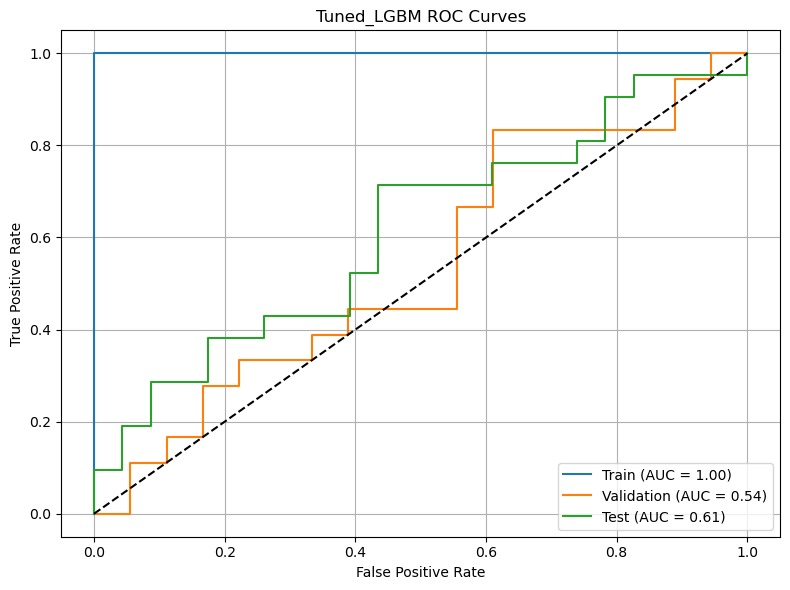

In [65]:
evaluate_model("Tuned_LGBM", best_lgbm, X_train, y_train, X_val, y_val, X_test, y_test)